<a href="https://colab.research.google.com/github/BrendaLoznik/AdventureWorksBIReport/blob/main/time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime


In [3]:
pd.set_option("display.max_columns", 250)
pd.set_option("display.max_rows", 100)

In [4]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#load the nutrients dataset
#nutrients = pd.read_csv('/content/gdrive/MyDrive/Kaggle/Agrifirm/nutrients_month.csv')
#nutrients.head()

**Python for time series**

In [7]:
#create datetime array with a precision of a year
df = np.array(['2020-03-15', '2020-03-16', '2020-03-17'], dtype='datetime64[Y]')

array(['2020', '2020', '2020'], dtype='datetime64[Y]')

In [9]:
#create 7 day date range
np.arange('2018-06-01', '2018-06-23', step=7, dtype = 'datetime64[D]')

array(['2018-06-01', '2018-06-08', '2018-06-15', '2018-06-22'],
      dtype='datetime64[D]')

In [13]:
#create pandas datetime index
pd.date_range('2020-01-01', periods=7, freq='D')

pd.date_range('Jan, 01, 2018', periods=7, freq='D')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07'],
              dtype='datetime64[ns]', freq='D')

In [22]:
#convert list to datetime with built in format type
pd.to_datetime(['23/2/2020', '1/3/2018' ], format = '%d/%m/%Y')

DatetimeIndex(['2020-02-23', '2018-03-01'], dtype='datetime64[ns]', freq=None)

In [31]:
data = np.random.randn(3,2)
cols = ['A','B']
#print(data)

#create dataframe with datetime index
idx = pd.date_range('2020-01-01', periods=3, freq='D')
df=pd.DataFrame(data, index = idx, columns= cols)

print(df)

print(df.index.max()) #latest date
df.index.argmax() #index with latest date

                   A         B
2020-01-01 -0.466384 -0.214227
2020-01-02 -0.102082 -1.374111
2020-01-03  1.695059  2.447594
2020-01-03 00:00:00


2

**Time resampling**

In [34]:
df = pd.read_csv('/content/gdrive/MyDrive/Kaggle/timeseries/starbucks[1].csv',
                 index_col= 'Date', parse_dates = True)
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [37]:
#resample
# list with dateOffset codes: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

#A: daily data --> mean yearly data
df.resample(rule = 'A').mean()



,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [38]:
#custom aggregate (resample) function
def first_day (entry):  
  if len(entry) != 0:   #is there an entry. if so, return first entry
    return entry[0] 

#returns first closing/volume data for each year
df.resample(rule='A').apply(first_day) 

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


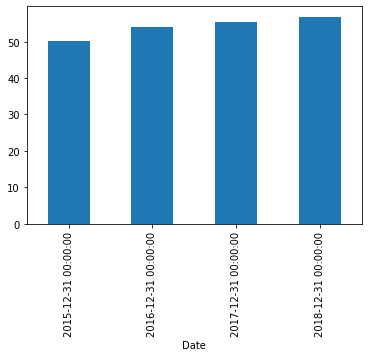

In [39]:
df = pd.read_csv('/content/gdrive/MyDrive/Kaggle/timeseries/starbucks[1].csv',
                 index_col= 'Date', parse_dates = True)

#create a resampled series and plot it (average closing price per year)
df['Close'].resample('A').mean().plot.bar()

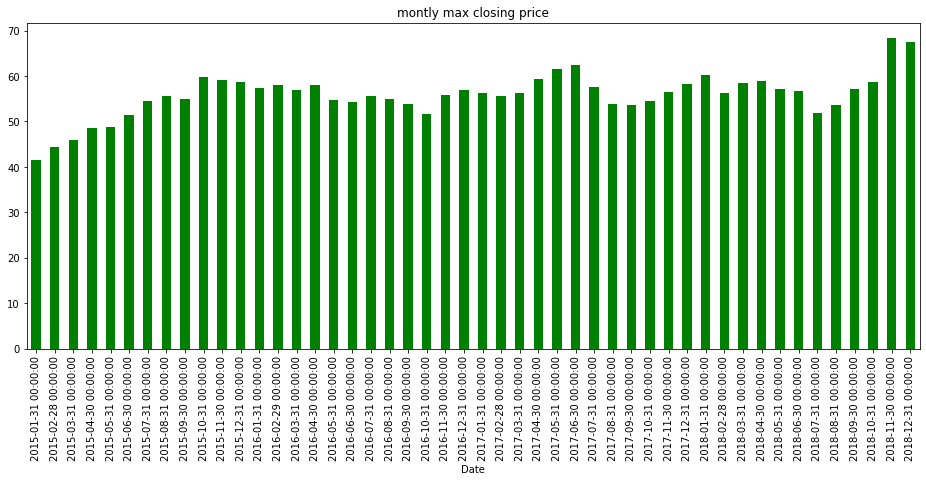

In [41]:
#montly max closing price
df['Close']. resample('M').max().plot.bar(figsize=(16,6), 
                                          title = "montly max closing price", color = 'green')

**Time shifting**

In [42]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [50]:
#shift all datapoint down by the provided number of rows
df.shift(1).head()


,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0


In [51]:
#shift data one month forward (you push everything to the end of the month)
df.shift(periods = 1, freq = 'M').head()

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548


**Rolling and expanding**

In [52]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


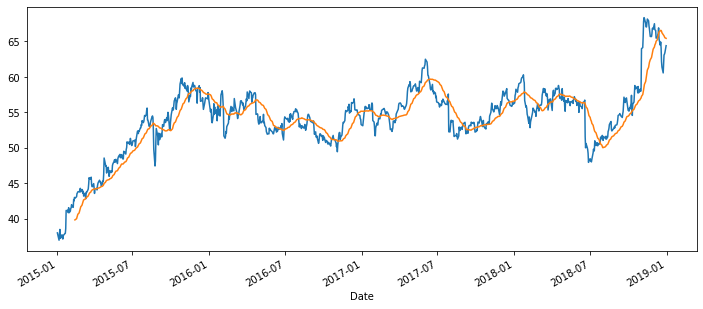

In [58]:
#plot closing time over time
df['Close'].plot.line(figsize=(12,5))

#plot 30 day roling average
df.rolling(window = 30).mean()['Close'].plot()

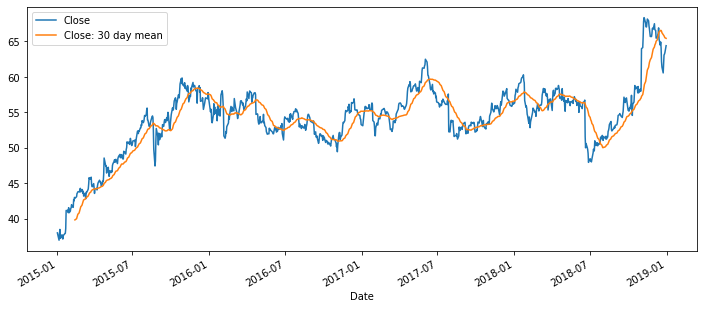

In [61]:
#similar as above, but added to dataframe and therefore a legend
df['Close: 30 day mean'] = df['Close'].rolling(window=30).mean()
df[['Close','Close: 30 day mean' ]].plot(figsize=(12,5))

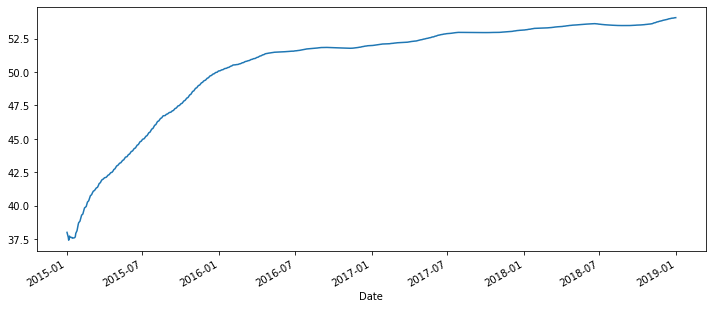

In [62]:
#at each timepoint you take the average of all data before this datapoint
df['Close'].expanding().mean().plot(figsize=(12,5))

**Visualizing time series data**